<b> Practice Notebook based on Deep Learning Classification </b>

Exercise link : https://www.learnpytorch.io/02_pytorch_classification/

In [2]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

<b> Binary Classification </b>

In [3]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=1000 , noise=0.3 , random_state=42)

In [4]:
X[:5] , y[:5]

(array([[-0.17186341,  0.59624885],
        [ 1.25328273, -0.26541353],
        [ 0.72322405,  0.2319425 ],
        [-0.06519764, -0.65519443],
        [-0.79949325,  0.55293543]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [5]:
len(X) , len(y)

(1000, 1000)

In [6]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

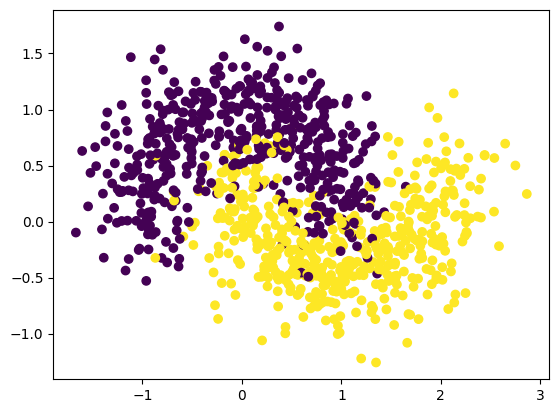

In [7]:
plt.scatter(X[: , 0] , X[: , 1] , c=y)

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [12]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2 , out_features=16 , dtype=torch.float),
            nn.ReLU(),
            nn.Linear(in_features=16 , out_features=16 , dtype=torch.float),
            nn.ReLU(),
            nn.Linear(in_features=16 , out_features=1 , dtype=torch.float)
        )
    
    def forward(self , X : torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [13]:
Model = MoonModel()

In [14]:
Model.eval()
with torch.inference_mode():
    logits = Model(X_train)

In [15]:
Model.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.6010, -0.5656],
                      [-0.6989, -0.4893],
                      [-0.6072, -0.3271],
                      [-0.2849,  0.5786],
                      [ 0.1897,  0.4665],
                      [ 0.4028, -0.3343],
                      [ 0.6510,  0.0098],
                      [-0.2750,  0.4619],
                      [ 0.5405, -0.1937],
                      [ 0.3698,  0.1310],
                      [ 0.6637,  0.0460],
                      [-0.1982, -0.4250],
                      [-0.6063,  0.6545],
                      [-0.2732,  0.5236],
                      [ 0.2729, -0.4827],
                      [-0.3412,  0.6449]])),
             ('layer_stack.0.bias',
              tensor([-0.6710,  0.0498, -0.4264,  0.4488, -0.1606, -0.0575,  0.1046, -0.5711,
                      -0.3119, -0.2361, -0.4702,  0.3786,  0.2753, -0.6212,  0.6324, -0.4319])),
             ('layer_stack.2.weight',
              tensor([

In [16]:
loss_fn = nn.BCEWithLogitsLoss()
Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

In [17]:
def accuracy_fn(y_true , y_pred):
    correct_preds = (y_true == y_pred).sum().item()
    acc = round((correct_preds / len(y_pred)) * 100)# accuracy(%)
    return acc

In [36]:
epochs = 500

for epoch in range(epochs):

    Model.train()
    train_logits = Model(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    loss = loss_fn(train_logits , y_train)
    acc = accuracy_fn(y_train , train_pred)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 50 == 0:
        Model.eval()
        with torch.inference_mode():
            test_logits = Model(X_test).squeeze()
            test_pred = torch.sigmoid(test_logits).round()

            loss = loss_fn(test_logits , y_test)
            acc = accuracy_fn(y_test , test_pred)

            print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} %  |Test-Loss {loss_fn(test_logits , y_test)} | Test-Accuracy : {accuracy_fn(y_test , test_pred)} ")

Epoch : 0 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 50 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 100 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 150 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 200 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 250 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 300 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 350 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 400 | Loss : 606.4826049804688 | Accuracy : 87 %  |Test-Loss 606.4826049804688 | Test-Accuracy : 87 
Epoch : 450 | Loss : 6

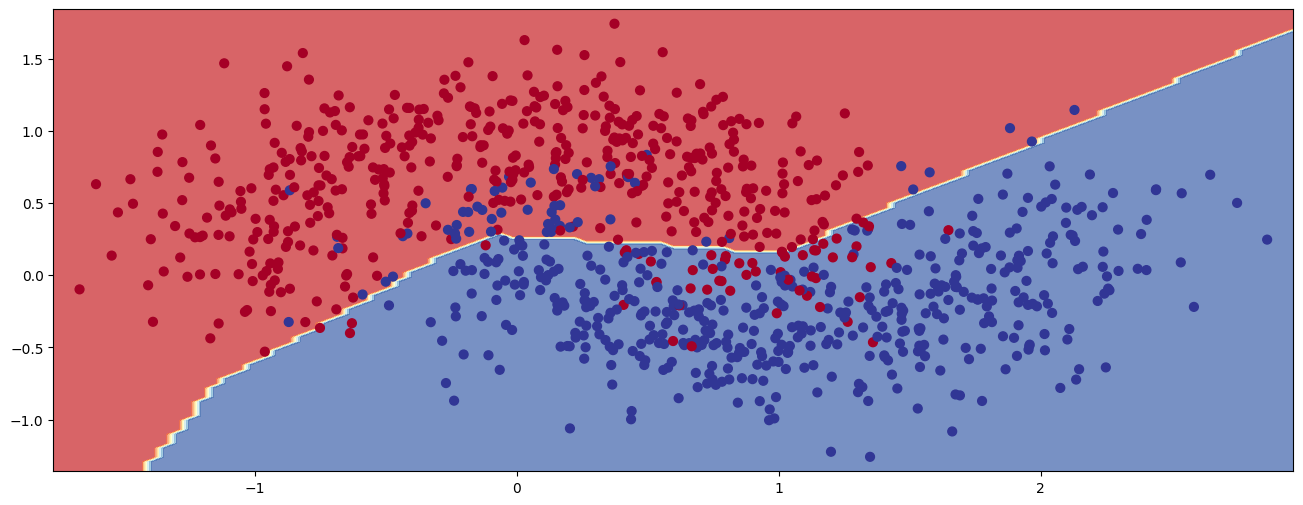

In [37]:
# X_eval , y_eval = make_moons(100 , noise=0.3 , random_state=42)
# X_eval = torch.from_numpy(X_eval).type(torch.float)
# y_eval = torch.from_numpy(y_eval).type(torch.float)

from helper_functions import plot_decision_boundary

plt.figure(figsize=(16 , 6))
plot_decision_boundary(Model , X , y)

<b> Mulit-class Classification </b>

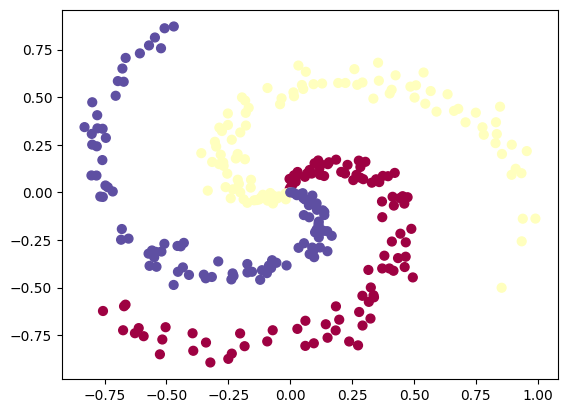

In [20]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_dots = np.zeros((N*K,D)) # data matrix (each row = single example)
y_dots = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_dots[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_dots[ix] = j
# lets visualize the data
plt.scatter(X_dots[:, 0], X_dots[:, 1], c=y_dots, s=40, cmap=plt.cm.Spectral)
plt.show()

In [21]:
X_dots = torch.from_numpy(X_dots).type(torch.float64)
y_dots = torch.from_numpy(y_dots).type(torch.LongTensor)

In [22]:
X_dots.dtype

torch.float64

In [23]:
X_dots[:5] , y_dots[:5]

(tensor([[-0.0000,  0.0000],
         [ 0.0029,  0.0097],
         [-0.0018,  0.0201],
         [ 0.0034,  0.0301],
         [ 0.0084,  0.0395]], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0]))

In [24]:
X_dots.shape , y_dots.shape

(torch.Size([300, 2]), torch.Size([300]))

In [25]:
X_dots_train, X_dots_test, y_dots_train, y_dots_test = train_test_split(X_dots, y_dots, test_size=0.2, random_state=42)

In [26]:
X_dots_train.shape, X_dots_test.shape, y_dots_train.shape, y_dots_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [27]:
class SpiralModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2 , out_features=8 , dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(in_features=8 , out_features=8 , dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(in_features=8 , out_features=4 , dtype=torch.float64)
        )

    def forward(self , X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [28]:
SpiralModel = SpiralModel()

In [29]:
loss_fn = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(params=SpiralModel.parameters() , lr=0.1)

In [30]:
SpiralModel.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.2628,  0.1820],
                      [-0.4106, -0.4387],
                      [ 0.0416, -0.6678],
                      [-0.1774,  0.2778],
                      [ 0.5071,  0.6490],
                      [ 0.0300,  0.0399],
                      [-0.2058, -0.4874],
                      [ 0.4141,  0.5231]], dtype=torch.float64)),
             ('layer_stack.0.bias',
              tensor([-0.1445, -0.3177, -0.2467,  0.5972,  0.2152,  0.0227,  0.0383,  0.5581],
                     dtype=torch.float64)),
             ('layer_stack.2.weight',
              tensor([[-0.0380, -0.1578, -0.3058, -0.1403, -0.1965,  0.2001, -0.0342, -0.3011],
                      [-0.0930,  0.3277, -0.2612, -0.1142, -0.2357,  0.3299,  0.1357,  0.0418],
                      [-0.1758,  0.2018, -0.2395, -0.0879, -0.2956,  0.0485,  0.1435,  0.1072],
                      [ 0.1232, -0.2024, -0.1186,  0.2956, -0.1687,  0.1358,  0.2131,  0.0449],
     

In [38]:
epochs = 3000

for epoch in range(epochs):

    SpiralModel.train()
    train_logits = SpiralModel(X_dots_train)
    train_pred = torch.argmax(torch.softmax(train_logits , dim=1) , dim=1)

    loss = loss_fn(train_logits , y_dots_train)
    acc = accuracy_fn(y_dots_train , train_pred)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 250 == 0:
        SpiralModel.eval()
        with torch.inference_mode():
            test_logits = SpiralModel(X_dots_test)
            test_pred = torch.argmax(torch.softmax(test_logits , dim=1) , dim=1)

            test_loss = loss_fn(test_logits , y_dots_test)
            test_acc = accuracy_fn(y_dots_test , test_pred)

        
        print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} %  |Test-Loss {test_loss} | Test-Accuracy : {test_acc} %")

Epoch : 0 | Loss : 0.11307677421584492 | Accuracy : 95 %  |Test-Loss 0.09798331600069395 | Test-Accuracy : 97 %
Epoch : 250 | Loss : 0.10623017426097885 | Accuracy : 95 %  |Test-Loss 0.08851795003807736 | Test-Accuracy : 97 %
Epoch : 500 | Loss : 0.09940497321724034 | Accuracy : 97 %  |Test-Loss 0.07940233806333015 | Test-Accuracy : 97 %
Epoch : 750 | Loss : 0.09227464124399229 | Accuracy : 97 %  |Test-Loss 0.07127089681692905 | Test-Accuracy : 98 %
Epoch : 1000 | Loss : 0.0850480714422959 | Accuracy : 97 %  |Test-Loss 0.06336749508826958 | Test-Accuracy : 100 %
Epoch : 1250 | Loss : 0.0783511715308832 | Accuracy : 97 %  |Test-Loss 0.055564315984846284 | Test-Accuracy : 100 %
Epoch : 1500 | Loss : 0.07220464589726668 | Accuracy : 98 %  |Test-Loss 0.0488829181768808 | Test-Accuracy : 100 %
Epoch : 1750 | Loss : 0.06642803712810912 | Accuracy : 98 %  |Test-Loss 0.04347270282880818 | Test-Accuracy : 100 %
Epoch : 2000 | Loss : 0.06150860498708541 | Accuracy : 98 %  |Test-Loss 0.0391940633

Text(0.5, 1.0, 'Test')

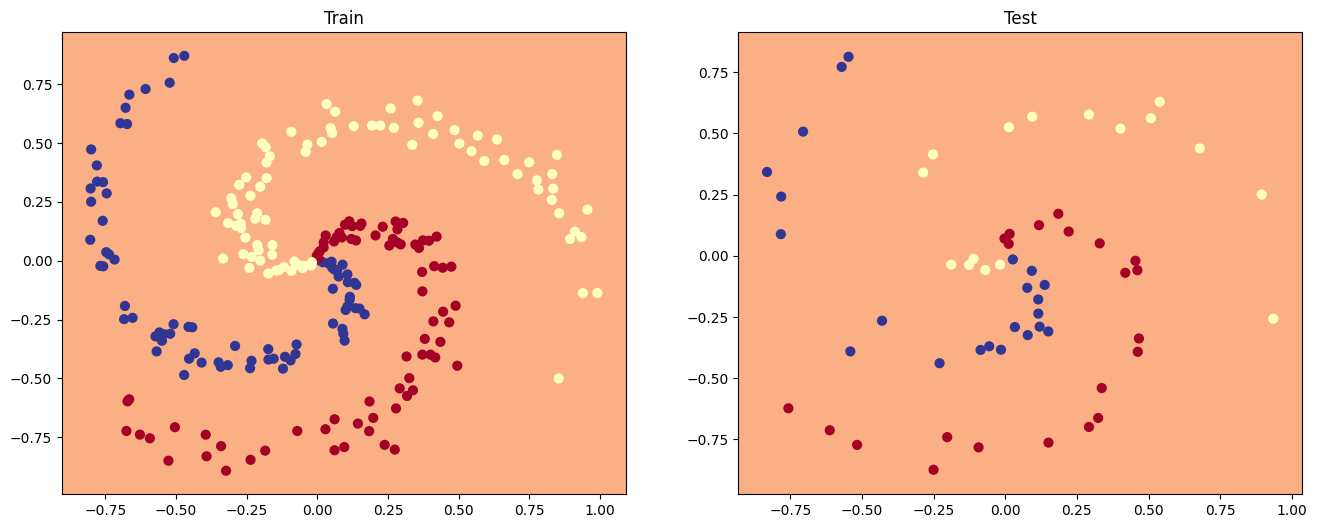

In [39]:
plt.figure(figsize=(16 , 6))

plt.subplot(1 , 2 , 1)
plot_decision_boundary(Model , X_dots_train , y_dots_train)
plt.title("Train")

plt.subplot(1 , 2 , 2)
plot_decision_boundary(Model , X_dots_test , y_dots_test)
plt.title("Test")